In [1]:
import scipy.io

import numpy as np, os

In [2]:
ROOT_PATH = u'C:/Users/cricr/OneDrive - Politecnico di Milano/Università/MASTER/applied AI in Biomedicine/project/train'

Load data

In [3]:
mat1 = scipy.io.loadmat(ROOT_PATH + '/S001_128.mat')
mat2 = scipy.io.loadmat(ROOT_PATH + '/S001_128_ann.mat')
mat3 = scipy.io.loadmat(ROOT_PATH + '/S001_128_spk.mat')

In [4]:
print(mat1)
print(mat2)
print(mat3)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACA64, Created on: Tue Nov  7 09:57:28 2023', '__version__': '1.0', '__globals__': [], 'ppg': array([[-2.38138363],
       [-2.38135063],
       [-2.38131159],
       ...,
       [-3.93333424],
       [-4.06168546],
       [-4.2308891 ]])}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACA64, Created on: Tue Nov  7 09:57:28 2023', '__version__': '1.0', '__globals__': [], 'labels': array(['N', 'N', 'N', ..., 'N', 'S', 'N'], dtype='<U1')}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACA64, Created on: Tue Nov  7 09:57:28 2023', '__version__': '1.0', '__globals__': [], 'speaks': array([[    83],
       [   165],
       [   247],
       ...,
       [229984],
       [230050],
       [230157]])}


In [5]:
recording = np.asarray(mat1['ppg'], dtype=np.float64)

In [6]:
print(recording)

[[-2.38138363]
 [-2.38135063]
 [-2.38131159]
 ...
 [-3.93333424]
 [-4.06168546]
 [-4.2308891 ]]


In [7]:
# Get number of ann files contained in the folder
path_ppgs_128 = []
path_ppgs_250 = []
for f in os.listdir(ROOT_PATH):
    g = os.path.join(ROOT_PATH, f)
    if not f.lower().startswith('.') and f.lower().endswith('_128.mat') and os.path.isfile(g):
        path_ppgs_128.append(g)
    elif not f.lower().startswith('.') and f.lower().endswith('_250.mat') and os.path.isfile(g):
        path_ppgs_250.append(g)

num_files_128 = len(path_ppgs_128)
num_files_250 = len(path_ppgs_250)

In [8]:
print("cases 128: ")
print(num_files_128)
print("cases 250: ")
print(num_files_250)
print("Tot: ")
print(num_files_128 + num_files_250)

cases 128: 
62
cases 250: 
43
Tot: 
105


In [9]:
# Create empty list for annotation, peak position and ppg signals of files
#Annotation: labels which can assume 3 values: N (Normal), V (Ventricular), S(SuperVentricular)
#speaks: contains peak positions in samples
#ppg: contains the ppg signal in samples
annotations_128 = list()
speaks_128 = list()
ppgs_128 = list()

# Load files for each subject using the function "loadmat"
for i in range(num_files_128):
    print('Loading file: ' + str(i+1) + '/' + str(num_files_128))
    root = path_ppgs_128[i].split("_")
    ppgMat = scipy.io.loadmat(path_ppgs_128[i])
    ppg = np.asarray(ppgMat['ppg'], dtype=np.float64)
    annotationMat = scipy.io.loadmat(root[0] + '_128_ann.mat')
    annotation = np.asarray(annotationMat['labels'])
    speaksMat = scipy.io.loadmat(root[0] + '_128_spk.mat')
    speaks = np.asarray(speaksMat['speaks'])
    
    annotations_128.append(annotation)
    speaks_128.append(speaks)
    ppgs_128.append(ppg)
    
annotations_250 = list()
speaks_250 = list()
ppgs_250 = list()

# Load files for each subject using the function "loadmat"
for i in range(num_files_250):
    print('Loading file: ' + str(i+1) + '/' + str(num_files_250))
    root = path_ppgs_250[i].split("_")
    ppgMat = scipy.io.loadmat(path_ppgs_250[i])
    ppg = np.asarray(ppgMat['ppg'], dtype=np.float64)
    annotationMat = scipy.io.loadmat(root[0] + '_250_ann.mat')
    annotation = np.asarray(annotationMat['labels'])
    speaksMat = scipy.io.loadmat(root[0] + '_250_spk.mat')
    speaks = np.asarray(speaksMat['speaks'])
    
    annotations_250.append(annotation)
    speaks_250.append(speaks)
    ppgs_250.append(ppg)
    
    

Loading file: 1/62
Loading file: 2/62
Loading file: 3/62
Loading file: 4/62
Loading file: 5/62
Loading file: 6/62
Loading file: 7/62
Loading file: 8/62
Loading file: 9/62
Loading file: 10/62
Loading file: 11/62
Loading file: 12/62
Loading file: 13/62
Loading file: 14/62
Loading file: 15/62
Loading file: 16/62
Loading file: 17/62
Loading file: 18/62
Loading file: 19/62
Loading file: 20/62
Loading file: 21/62
Loading file: 22/62
Loading file: 23/62
Loading file: 24/62
Loading file: 25/62
Loading file: 26/62
Loading file: 27/62
Loading file: 28/62
Loading file: 29/62
Loading file: 30/62
Loading file: 31/62
Loading file: 32/62
Loading file: 33/62
Loading file: 34/62
Loading file: 35/62
Loading file: 36/62
Loading file: 37/62
Loading file: 38/62
Loading file: 39/62
Loading file: 40/62
Loading file: 41/62
Loading file: 42/62
Loading file: 43/62
Loading file: 44/62
Loading file: 45/62
Loading file: 46/62
Loading file: 47/62
Loading file: 48/62
Loading file: 49/62
Loading file: 50/62
Loading f

Text(0.5, 1.0, '128 Signal length distribution')

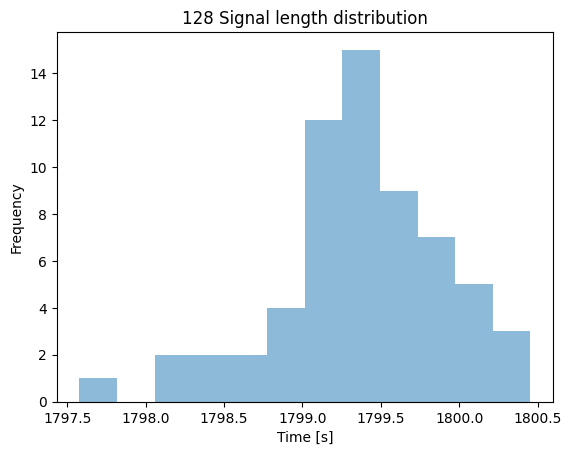

In [10]:
"Plot signal length distribution"
import pandas as pd
fs = 128  # To complete
# Create empty list to contain the different recording lenghts
length_recordings = list()

# Iterate through the different signals stored in "recordings": store signal
# length in senconds.
#We can derive the length by len[]/f
for rec_temp in ppgs_128:
    length_recordings.append(len(rec_temp) / fs)  # To Complete

# Transform to pandas series and plot histogram.
length_rec_s = pd.Series(length_recordings)
ax = length_rec_s.plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("Time [s]")
ax.set_title("128 Signal length distribution")


In [11]:
#Take the first ppg 128 as sample for the next examples
signal_temp = ppgs_128[0]

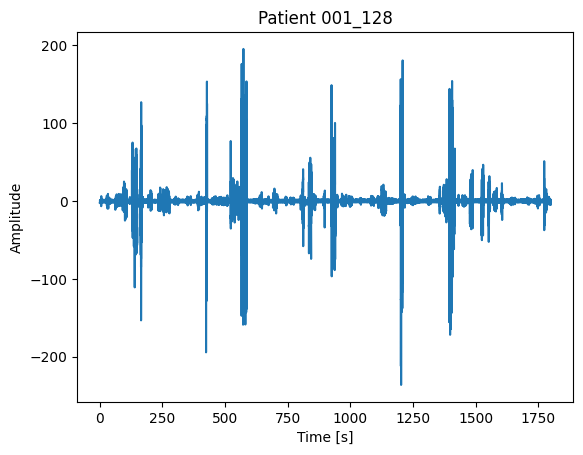

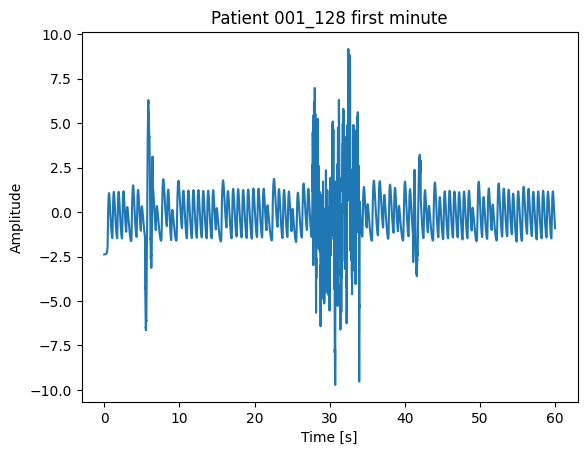

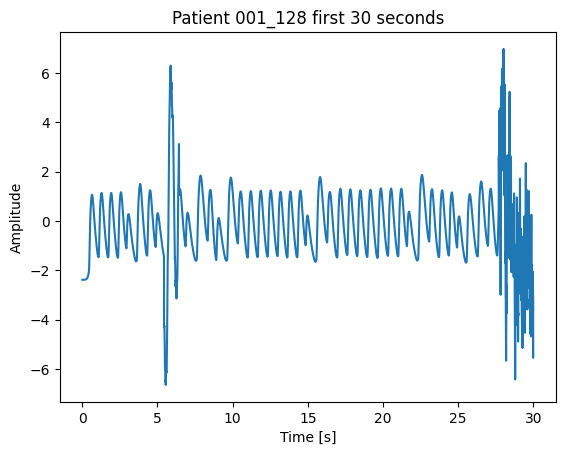

In [12]:
import matplotlib.pyplot as plt
lead = 0

#Plot 1 sample
t = np.arange(0, signal_temp.shape[0]/fs, 1/fs)

fig, axs = plt.subplots()
axs.set_title("Patient 001_128")
axs.plot(t, signal_temp, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Plot only the first minute 
signal_temp_reduced = signal_temp[:(128*60)]
t2 = np.arange(0, signal_temp_reduced.shape[0]/fs, 1/fs) 

fig2, axs = plt.subplots()
axs.set_title("Patient 001_128 first minute")
axs.plot(t2, signal_temp_reduced, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Plot only the first 30 seconds 
signal_temp_reduced_2 = signal_temp[:(128*30)]
t3 = np.arange(0, signal_temp_reduced_2.shape[0]/fs, 1/fs) 

fig3, axs = plt.subplots()
axs.set_title("Patient 001_128 first 30 seconds")
axs.plot(t3, signal_temp_reduced_2, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Possiamo apprezzare un disturbo sui 30 secondi

In [13]:

#Take the second ppg 128 as sample
signal_temp2 = ppgs_128[1]

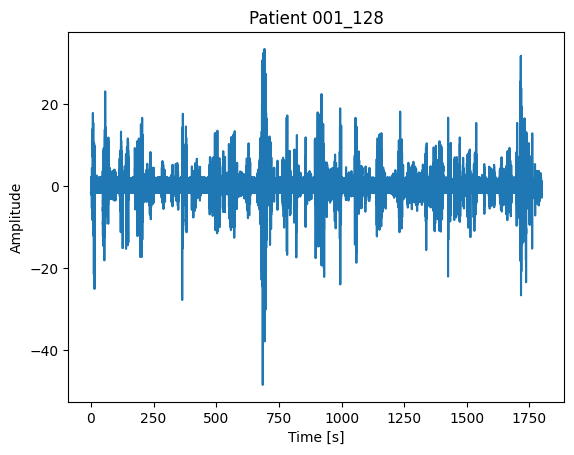

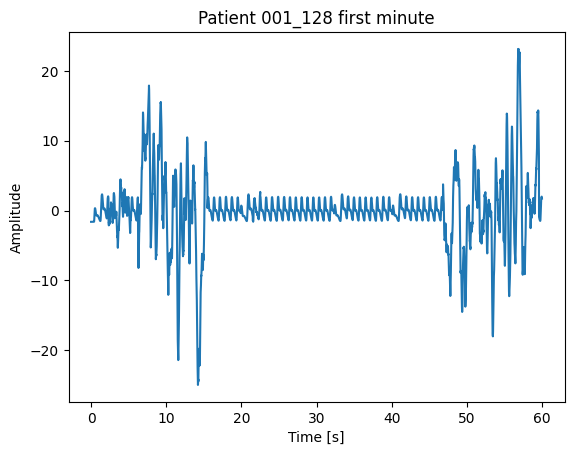

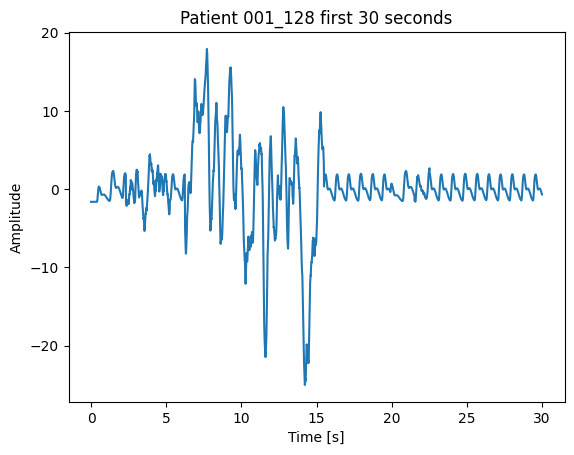

In [14]:
import matplotlib.pyplot as plt
lead = 0

#Plot 1 sample
t = np.arange(0, signal_temp2.shape[0]/fs, 1/fs)

fig, axs = plt.subplots()
axs.set_title("Patient 001_128")
axs.plot(t, signal_temp2, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Plot only the first minute 
signal_temp_reduced = signal_temp2[:(128*60)]
t2 = np.arange(0, signal_temp_reduced.shape[0]/fs, 1/fs) 

fig2, axs = plt.subplots()
axs.set_title("Patient 001_128 first minute")
axs.plot(t2, signal_temp_reduced, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Plot only the first 30 seconds 
signal_temp_reduced_2 = signal_temp2[:(128*30)]
t3 = np.arange(0, signal_temp_reduced_2.shape[0]/fs, 1/fs) 

fig3, axs = plt.subplots()
axs.set_title("Patient 001_128 first 30 seconds")
axs.plot(t3, signal_temp_reduced_2, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Possiamo apprezzare un disturbo sui 30 secondi

In [15]:
import heartpy as hp

signal_temp_unidimensional = np.ravel(signal_temp)
#Let's run it through a standard butterworth bandpass implementation to remove everything < 0.8 and > 3.5 Hz.
filtered_ppg = hp.filter_signal(signal_temp_unidimensional, 
                                cutoff = [0.5, 8], 
                                filtertype = 'bandpass',
                                sample_rate = 128, 
                                order = 3,
                                return_top = False)

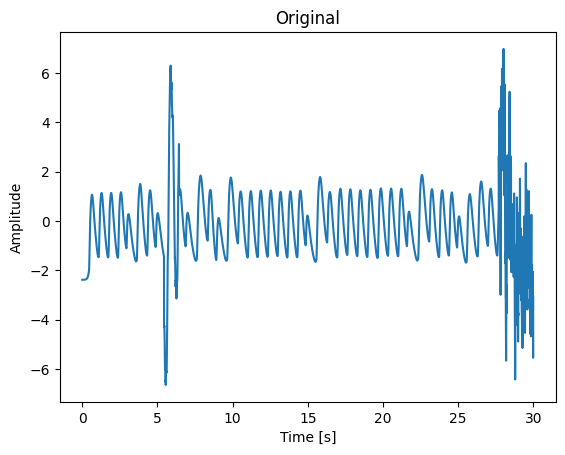

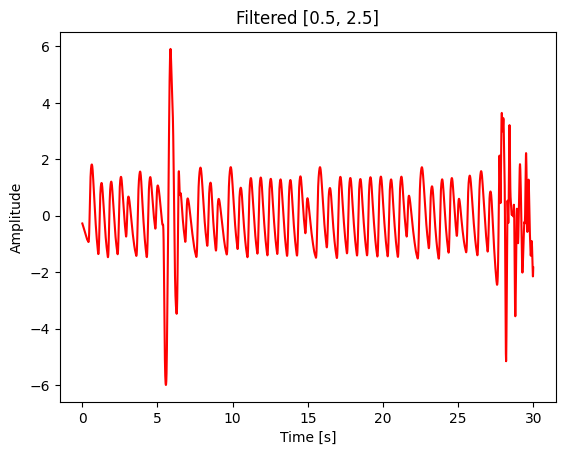

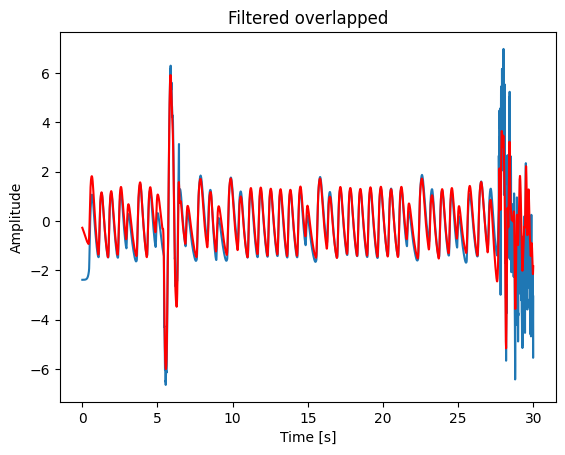

In [16]:
#Plot only the first 30 seconds 
signal_temp_reduced = signal_temp[:(128*30)]
t3 = np.arange(0, signal_temp_reduced.shape[0]/fs, 1/fs) 
fig3, axs = plt.subplots()
axs.set_title("Original")
axs.plot(t3, signal_temp_reduced, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Plot only the first 30 seconds of the preprocessed
filt_red = filtered_ppg[:(128*30)]
t3 = np.arange(0, filt_red.shape[0]/fs, 1/fs)
fig3, axs = plt.subplots()
axs.set_title("Filtered [0.5, 2.5]")
axs.plot(t3, filt_red, color='r')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Filtered over original
#Plot only the first 30 seconds of the preprocessed
fig3, axs = plt.subplots()
axs.set_title("Filtered overlapped")
axs.plot(t3, signal_temp_reduced, color='C0')
axs.plot(t3, filt_red, color='r')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

In [17]:
def normalize_ppg_signal(ppg_signal):
    """
    Normalize a PPG signal to have zero mean and a standard deviation of one. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8122812/ 2.1.2
    """
    mean = np.mean(ppg_signal)
    std = np.std(ppg_signal)

    normalized_signal = (ppg_signal - mean) / std
    return np.array(normalized_signal)

In [18]:
normalized = normalize_ppg_signal(filtered_ppg)

In [19]:
print(type(normalized))

<class 'numpy.ndarray'>


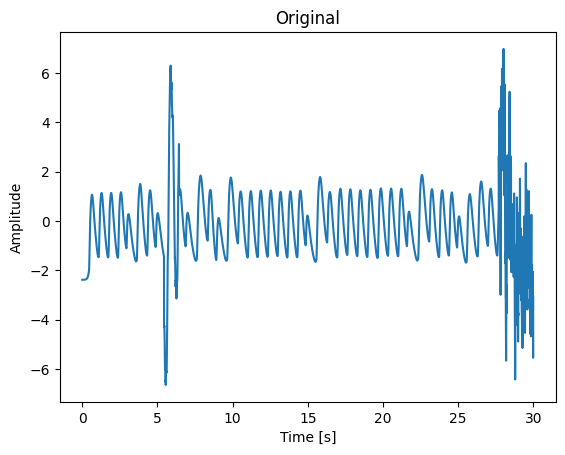

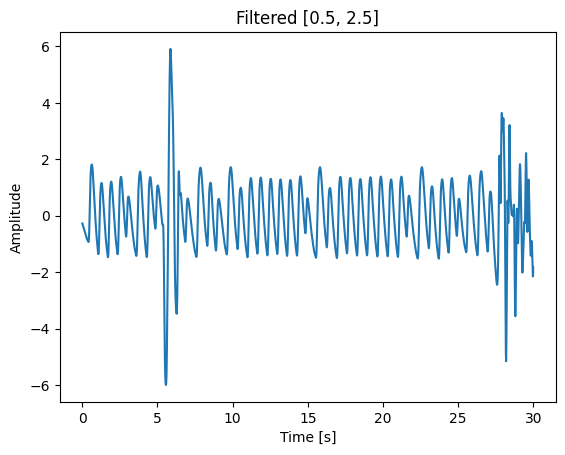

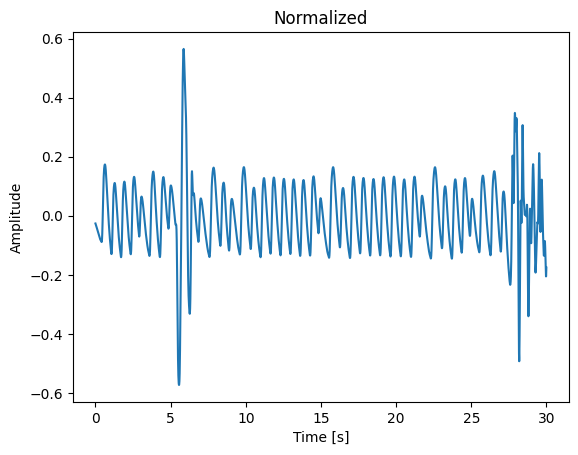

In [20]:
#Plot only the original first 30 seconds 
signal_temp_reduced = signal_temp[:(128*30)]
t3 = np.arange(0, signal_temp_reduced.shape[0]/fs, 1/fs) 
fig3, axs = plt.subplots()
axs.set_title("Original")
axs.plot(t3, signal_temp_reduced, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Plot only the first 30 seconds of the filtered
filt_red = filtered_ppg[:(128*30)]
t3 = np.arange(0, filt_red.shape[0]/fs, 1/fs)
fig3, axs = plt.subplots()
axs.set_title("Filtered [0.5, 2.5]")
axs.plot(t3, filt_red, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Plot normalized 30 seconds
normalized_reduced = normalized[:(128*30)]
t3 = np.arange(0, normalized_reduced.shape[0]/fs, 1/fs) 
fig3, axs = plt.subplots()
axs.set_title("Normalized")
axs.plot(t3, normalized_reduced, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

In [21]:
def baseline_correction(ppg_signal, polynomial_degree):
    """
    Perform baseline correction on a PPG signal using polynomial fit.
    """
    # Create time indices for the signal
    time_indices = np.arange(len(ppg_signal))

    # Fit a polynomial to the signal to capture the trend
    polynomial_coefficients = np.polyfit(time_indices, ppg_signal, polynomial_degree)

    # Evaluate the polynomial to obtain the trend
    trend = np.polyval(polynomial_coefficients, time_indices)

    # Subtract the trend to get the baseline-corrected signal
    baseline_corrected_signal = ppg_signal - trend

    return baseline_corrected_signal

In [22]:
base_corrected = baseline_correction(normalized, 4)

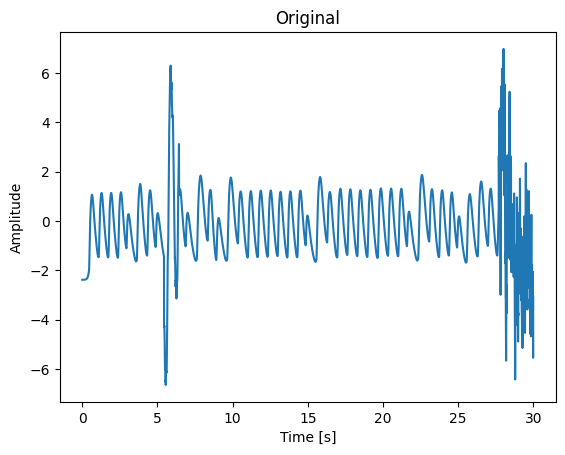

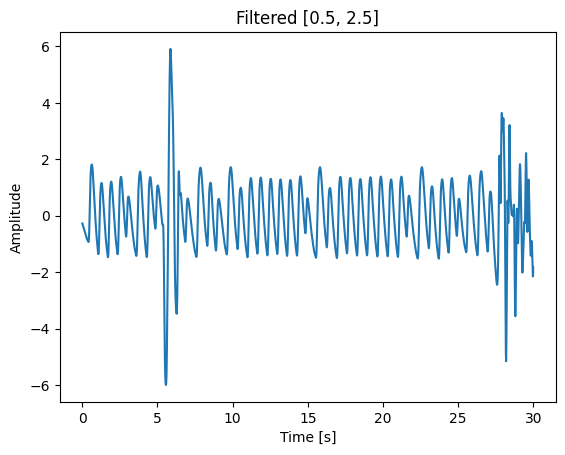

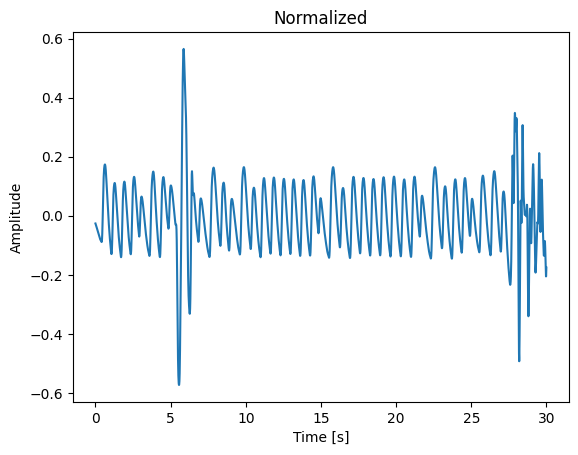

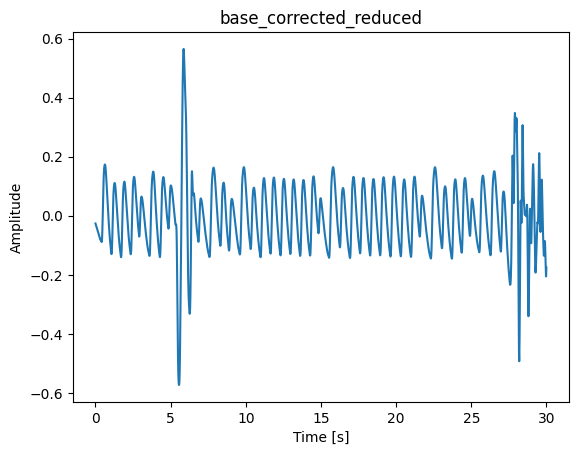

In [23]:
#Plot only the original first 30 seconds 
signal_temp_reduced = signal_temp[:(128*30)]
t3 = np.arange(0, signal_temp_reduced.shape[0]/fs, 1/fs) 
fig3, axs = plt.subplots()
axs.set_title("Original")
axs.plot(t3, signal_temp_reduced, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Plot only the first 30 seconds of the filtered
filt_red = filtered_ppg[:(128*30)]
t3 = np.arange(0, filt_red.shape[0]/fs, 1/fs)
fig3, axs = plt.subplots()
axs.set_title("Filtered [0.5, 2.5]")
axs.plot(t3, filt_red, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Plot normalized 30 seconds
normalized_reduced = normalized[:(128*30)]
t3 = np.arange(0, normalized_reduced.shape[0]/fs, 1/fs) 
fig3, axs = plt.subplots()
axs.set_title("Normalized")
axs.plot(t3, normalized_reduced, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#Plot baseline 30 seconds
base_corrected_reduced = base_corrected[:(128*30)]
t3 = np.arange(0, base_corrected_reduced.shape[0]/fs, 1/fs) 
fig3, axs = plt.subplots()
axs.set_title("base_corrected_reduced")
axs.plot(t3, base_corrected_reduced, color='C0')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

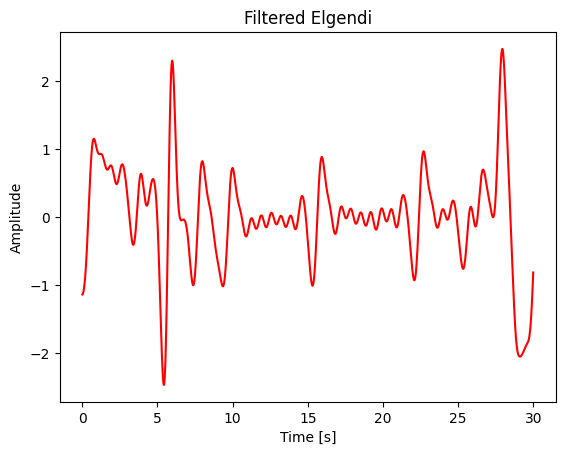

In [24]:
from neurokit2 import ppg

filtered2 = ppg.ppg_clean(signal_temp_unidimensional, method='elgendi')

#Plot only the first 30 seconds of the preprocessed
filt_red2 = filtered2[:(128*30)]
t3 = np.arange(0, filt_red2.shape[0]/fs, 1/fs) # To Complete
fig3, axs = plt.subplots()
axs.set_title("Filtered Elgendi")
axs.plot(t3, filt_red2, color='r')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

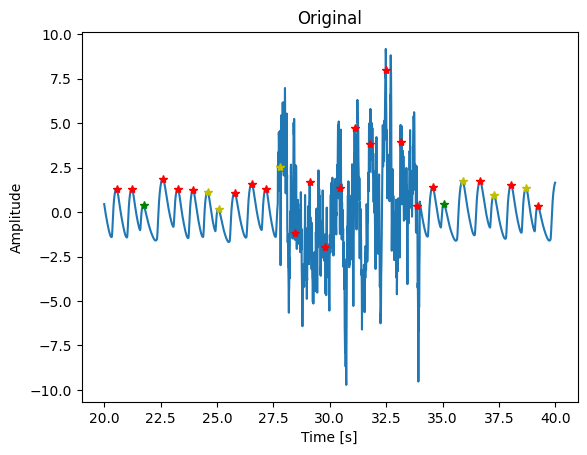

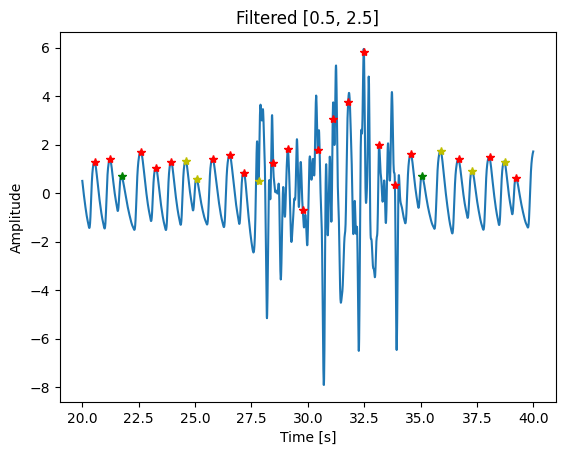

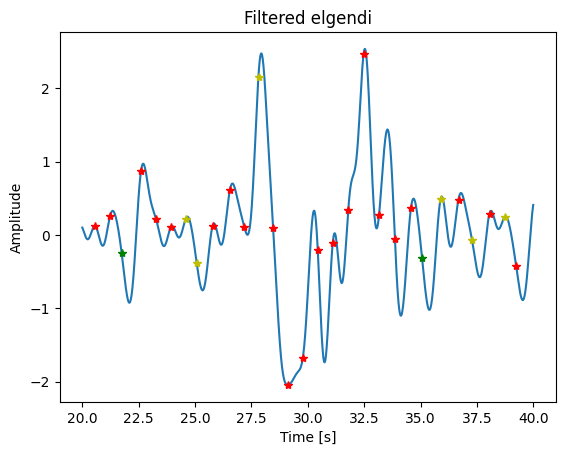

In [25]:
#Plot peaks positions

starting_time = 20
end_time = 40
time = np.arange(starting_time, end_time, 1/fs) # strat from 0 until the end of the signal_temp, with points distant by period 1/fs


fig, axs = plt.subplots()
#axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(time, signal_temp[(128*starting_time):(128*end_time)], color='C0')

i = 0
peak_pos = speaks_128[0][0]
components_out_of_interval = (128*starting_time)-1

for ann in annotations_128[0]:
    if(peak_pos >= components_out_of_interval+1 and peak_pos <= (128*end_time)):
        match ann:
            case 'N':
                axs.plot(time[peak_pos - components_out_of_interval],signal_temp[peak_pos],'*',color='r')
               
            case 'S':
                axs.plot(time[peak_pos - components_out_of_interval],signal_temp[peak_pos],'*',color='g')
                
            case 'V':
                axs.plot(time[peak_pos - components_out_of_interval],signal_temp[peak_pos],'*',color='y')
    i += 1
    if(i< len(annotations_128[0])):
        peak_pos = speaks_128[0][i]
    
#axs.plot(peakS/fs,signal_temp[0:20*128][posS],'*',color='r')
#axs.plot(peakV/fs,signal_temp[0:20*128][posV],'*',color='y')
axs.set_title("Original")
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#############################################################################################################

fig, axs = plt.subplots()
#axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(time, filtered_ppg[(128*starting_time):(128*end_time)], color='C0')

i = 0
peak_pos = speaks_128[0][0]
components_out_of_interval = (128*starting_time)-1

for ann in annotations_128[0]:
    if(peak_pos >= components_out_of_interval+1 and peak_pos <= (128*end_time)):
        match ann:
            case 'N':
                axs.plot(time[peak_pos - components_out_of_interval],filtered_ppg[peak_pos],'*',color='r')
               
            case 'S':
                axs.plot(time[peak_pos - components_out_of_interval],filtered_ppg[peak_pos],'*',color='g')
                
            case 'V':
                axs.plot(time[peak_pos - components_out_of_interval],filtered_ppg[peak_pos],'*',color='y')
    i += 1
    if(i< len(annotations_128[0])):
        peak_pos = speaks_128[0][i]
    
axs.set_title("Filtered [0.5, 2.5]")
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#############################################################################################################

starting_time = 20
end_time = 40
time = np.arange(starting_time, end_time, 1/fs) # strat from 0 until the end of the signal, with points distant by period 1/fs
fig, axs = plt.subplots()
#axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(time, filtered2[(128*starting_time):(128*end_time)], color='C0')

i = 0
peak_pos = speaks_128[0][0]
components_out_of_interval = (128*starting_time)-1

for ann in annotations_128[0]:
    if(peak_pos >= components_out_of_interval+1 and peak_pos <= (128*end_time)):
        match ann:
            case 'N':
                axs.plot(time[peak_pos - components_out_of_interval],filtered2[peak_pos],'*',color='r')
               
            case 'S':
                axs.plot(time[peak_pos - components_out_of_interval],filtered2[peak_pos],'*',color='g')
                
            case 'V':
                axs.plot(time[peak_pos - components_out_of_interval],filtered2[peak_pos],'*',color='y')
    i += 1
    if(i< len(annotations_128[0])):
        peak_pos = speaks_128[0][i]
axs.set_title("Filtered elgendi")
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

In [26]:
'''
#Try other approaches, but they seem to not work

from vital_sqi.common.band_filter import BandpassFilter
import plotly.graph_objects as go
# -----------------------------------------------------
# Apply band pass filter on PPG
# -----------------------------------------------------
# Create instances
ppg_sampling_rate = 128
butter_bandpass = BandpassFilter("butter", fs=ppg_sampling_rate)
cheby_bandpass = BandpassFilter("cheby1", fs=ppg_sampling_rate)
ellip_bandpass = BandpassFilter("ellip", fs=ppg_sampling_rate)

s_ppg = signal_temp_unidimensional
times_ppg = np.arange(0, signal_temp.shape[0]/fs, 1/fs)
# Apply
b1_ppg = butter_bandpass.signal_lowpass_filter(s_ppg, cutoff=1, order=5)
b2_ppg = butter_bandpass.signal_lowpass_filter(s_ppg, cutoff=0.8, order=5)
b3_ppg = butter_bandpass.signal_lowpass_filter(s_ppg, cutoff=0.6, order=5)
c1_ppg = cheby_bandpass.signal_lowpass_filter(s_ppg, cutoff=1, order=5)
e1_ppg = ellip_bandpass.signal_lowpass_filter(s_ppg, cutoff=1, order=5)

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=times_ppg, y=s_ppg, name='original'))
fig.add_trace(go.Scatter(x=times_ppg, y=b1_ppg, name='f=Butter, cutoff 1Hz'))
fig.add_trace(go.Scatter(x=times_ppg, y=b2_ppg, name='f=Butter, cutoff 0.8Hz'))
fig.add_trace(go.Scatter(x=times_ppg, y=b3_ppg, name='f=Butter, cutoff 0.6Hz'))
fig.add_trace(go.Scatter(x=times_ppg, y=c1_ppg, name='f=cheby, cutoff 0.6Hz'))
fig.add_trace(go.Scatter(x=times_ppg, y=e1_ppg, name='f=ellip, cutoff 0.6Hz'))

fig.show()
'''

'\n#Try other approaches, but they seem to not work\n\nfrom vital_sqi.common.band_filter import BandpassFilter\nimport plotly.graph_objects as go\n# -----------------------------------------------------\n# Apply band pass filter on PPG\n# -----------------------------------------------------\n# Create instances\nppg_sampling_rate = 128\nbutter_bandpass = BandpassFilter("butter", fs=ppg_sampling_rate)\ncheby_bandpass = BandpassFilter("cheby1", fs=ppg_sampling_rate)\nellip_bandpass = BandpassFilter("ellip", fs=ppg_sampling_rate)\n\ns_ppg = signal_temp_unidimensional\ntimes_ppg = np.arange(0, signal_temp.shape[0]/fs, 1/fs)\n# Apply\nb1_ppg = butter_bandpass.signal_lowpass_filter(s_ppg, cutoff=1, order=5)\nb2_ppg = butter_bandpass.signal_lowpass_filter(s_ppg, cutoff=0.8, order=5)\nb3_ppg = butter_bandpass.signal_lowpass_filter(s_ppg, cutoff=0.6, order=5)\nc1_ppg = cheby_bandpass.signal_lowpass_filter(s_ppg, cutoff=1, order=5)\ne1_ppg = ellip_bandpass.signal_lowpass_filter(s_ppg, cutoff=1, 

In [27]:
#Compact signals 128 info in a unique dataframe
signals_128_dataframes = []

for i in range(len(ppgs_128)):
    df_annotations = pd.DataFrame({
        #Execute -1 because matlab start counting from 1
        'peak_pos': np.ravel(speaks_128[i]) -1,
        'peak_nature': np.ravel(annotations_128[i])
    })
    
    df_values = pd.DataFrame({
        'PPG_Value': np.ravel(ppgs_128[i]),
    })
    
    # Merge DataFrames based on row positions
    merged_df = pd.merge(df_values, df_annotations, left_index=True, right_on='peak_pos', how='left')
    
    #Set isPeak true if that pos is a peak
    merged_df['isPeak'] = ~merged_df['peak_nature'].isnull()
    
    # Drop the 'peak_pos' column
    merged_df.drop(columns=['peak_pos'], inplace=True)
    
    # Reorder columns to have 'isPeak' in the second position
    merged_df = merged_df[['PPG_Value', 'isPeak', 'peak_nature']]
    
    # Reset index
    merged_df.reset_index(drop=True, inplace=True)
    signals_128_dataframes.append(merged_df)


In [28]:
#Compact signals 250 info in a unique dataframe
signals_250_dataframes = []

for i in range(len(ppgs_250)):
    df_annotations = pd.DataFrame({
        #Execute -1 because matlab start counting from 1
        'peak_pos': np.ravel(speaks_250[i]) -1,
        'peak_nature': np.ravel(annotations_250[i])
    })
    
    df_values = pd.DataFrame({
        'PPG_Value': np.ravel(ppgs_250[i]),
    })
    
    # Merge DataFrames based on row positions
    merged_df = pd.merge(df_values, df_annotations, left_index=True, right_on='peak_pos', how='left')
    
    #Set isPeak true if that pos is a peak
    merged_df['isPeak'] = ~merged_df['peak_nature'].isnull()
    
    # Drop the 'peak_pos' column
    merged_df.drop(columns=['peak_pos'], inplace=True)
    
    # Reorder columns to have 'isPeak' in the second position
    merged_df = merged_df[['PPG_Value', 'isPeak', 'peak_nature']]
    
    # Reset index
    merged_df.reset_index(drop=True, inplace=True)
    signals_250_dataframes.append(merged_df)


In [29]:
print(signals_128_dataframes[0])

        PPG_Value  isPeak peak_nature
0       -2.381384   False         NaN
1       -2.381351   False         NaN
2       -2.381312   False         NaN
3       -2.381265   False         NaN
4       -2.381211   False         NaN
...           ...     ...         ...
230383  -3.764836   False         NaN
230384  -3.752975   False         NaN
230385  -3.933334   False         NaN
230386  -4.061685   False         NaN
230387  -4.230889   False         NaN

[230388 rows x 3 columns]


In [31]:
first_signal = signals_128_dataframes[0]
print(first_signal)

        PPG_Value  isPeak peak_nature
0       -2.381384   False         NaN
1       -2.381351   False         NaN
2       -2.381312   False         NaN
3       -2.381265   False         NaN
4       -2.381211   False         NaN
...           ...     ...         ...
230383  -3.764836   False         NaN
230384  -3.752975   False         NaN
230385  -3.933334   False         NaN
230386  -4.061685   False         NaN
230387  -4.230889   False         NaN

[230388 rows x 3 columns]


In [33]:
first_signal.loc[:,"PPG_Value"]

0        -2.381384
1        -2.381351
2        -2.381312
3        -2.381265
4        -2.381211
            ...   
230383   -3.764836
230384   -3.752975
230385   -3.933334
230386   -4.061685
230387   -4.230889
Name: PPG_Value, Length: 230388, dtype: float64

In [36]:
first_signal.loc[0,"isPeak"]

False

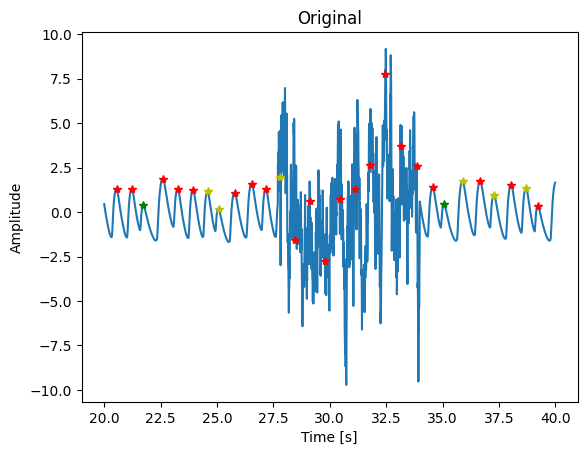

In [41]:
#Plot peaks positions
starting_time = 20
end_time = 40
time = np.arange(starting_time, end_time, 1/fs) # strat from 0 until the end of the signal_temp, with points distant by period 1/fs

signal_values = first_signal.loc[:,"PPG_Value"]

fig, axs = plt.subplots()
axs.plot(time, signal_values[(128*starting_time):(128*end_time)], color='C0')

components_out_of_interval = (128*starting_time)-1

for i in range((128*starting_time), (128*end_time), 1):
    if(first_signal.loc[i,"isPeak"]):
        match first_signal.loc[i,"peak_nature"]:
            case 'N':
                axs.plot(time[i - components_out_of_interval],first_signal.loc[i,"PPG_Value"],'*',color='r')
               
            case 'S':
                axs.plot(time[i - components_out_of_interval],first_signal.loc[i,"PPG_Value"],'*',color='g')
                
            case 'V':
                axs.plot(time[i - components_out_of_interval],first_signal.loc[i,"PPG_Value"],'*',color='y')

axs.set_title("Original")
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()
